In [12]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import xml.etree.ElementTree as ET

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.callbacks import *

from keras.applications.densenet import DenseNet121, preprocess_input

In [22]:
num_classes=120

inp = Input((224, 224, 3))
backbone = DenseNet121(input_tensor=inp,weights="./densenet121_weights_tf_dim_ordering_tf_kernels.h5")


In [23]:
x = backbone.output
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
outp = Dense(num_classes, activation="softmax")(x)

model = Model(inp, outp)

In [24]:
for layer in model.layers[:-6]:
    layer.trainable = False

In [25]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
URL_TRAIN = "D:/UNI/TESIS2/train"
URL_TEST = "D:/UNI/TESIS2/test"
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(URL_TRAIN,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_set = test_datagen.flow_from_directory(URL_TEST,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 16469 images belonging to 120 classes.
Found 4111 images belonging to 120 classes.


In [27]:
history = model.fit_generator(generator=train_set, 
                              steps_per_epoch=len(train_set), 
                              validation_data=test_set, 
                              validation_steps=len(test_set),
                              epochs=20)

Epoch 1/20
515/515 [==============================] - 218s 423ms/step - loss: 1.9840 - acc: 0.5602 - val_loss: 1.4286 - val_acc: 0.6247
Epoch 2/20
515/515 [==============================] - 199s 387ms/step - loss: 1.1154 - acc: 0.6938 - val_loss: 1.3444 - val_acc: 0.6473
Epoch 3/20
515/515 [==============================] - 199s 386ms/step - loss: 0.9951 - acc: 0.7203 - val_loss: 1.4397 - val_acc: 0.6378
Epoch 4/20
515/515 [==============================] - 199s 387ms/step - loss: 0.9331 - acc: 0.7425 - val_loss: 1.3383 - val_acc: 0.6675
Epoch 5/20
515/515 [==============================] - 199s 387ms/step - loss: 0.8919 - acc: 0.7508 - val_loss: 1.3330 - val_acc: 0.6631
Epoch 6/20
515/515 [==============================] - 199s 387ms/step - loss: 0.8765 - acc: 0.7510 - val_loss: 1.3431 - val_acc: 0.6638
Epoch 7/20
515/515 [==============================] - 199s 386ms/step - loss: 0.8355 - acc: 0.7665 - val_loss: 1.3839 - val_acc: 0.6677
Epoch 8/20
515/515 [============================

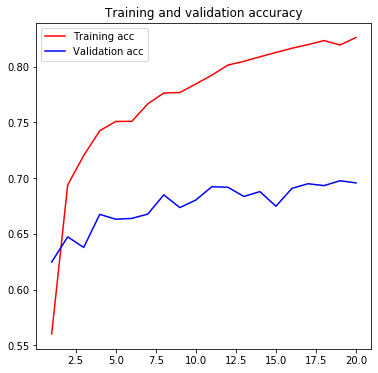

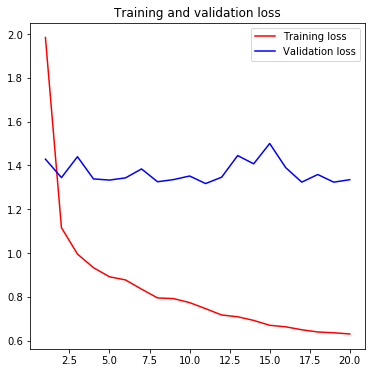

In [28]:
plt.rcParams['figure.figsize'] = (6,6)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [29]:
#######SAVING MODEL######
model_json = model.to_json()
with open("D:/UNI/TESIS2/model.json",'w') as json_file:
    json_file.write(model_json)
model.save_weights("D:/UNI/TESIS2/model.h5")